In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/usr/local/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
def pdf_fig(figure, filename):
    figure = figure.get_figure()
    figure.savefig("../../thesis/img/big-study/" + filename + ".pdf", bbox_inches = "tight")
    # seaborn styling
sns.set_style("darkgrid")
sns.set_palette(sns.husl_palette(h=.5, s=1))
sns.set_context("talk")

def label_bars_ints(ax):
    for p in ax.patches:
        ax.annotate("%.0i" % np.nan_to_num(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center', fontsize=14, color='black', xytext=(0, 10),
            textcoords='offset points')

def label_bars_floats(ax):
    for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center', fontsize=14, color='black', xytext=(0, 10),
            textcoords='offset points')

def process_fig(ax, name, technique, int_annotation, hue_title):
    if (int_annotation):
        label_bars_ints(ax)
    else:
        label_bars_floats(ax)
    if (hue_title != ''):
        ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), title=hue_title)
    pdf_fig(ax, name + '-' + technique)
    plt.show()
    ax.clear()

In [3]:
result = pd.read_csv('../inter-rater-reliablility.csv')
result

,task,number,language,slug,lognum,label correct,comment
0,0,0,Elixir,phoenixframework@phoenix,7,yes but more,one line before more two after
1,0,1,Scala,twitter@finagle,10,no,ca: failed test. an: warning about exception
2,0,2,Java,ReactiveX@RxJava,4,yes but more,"longer at end (until stating ""failure"")"
3,0,3,Haskell,purescript@purescript,7,yes but more addtional errors,way longer. showing more following error messages
4,0,4,Erlang,erlang@otp,1,yes,NaN
...,...,...,...,...,...,...,...
85,2,25,Perl,sjdy521@Mojo-Webqq,5,yes,NaN
86,2,26,Perl,sjdy521@Mojo-Webqq,6,yes,NaN
87,2,27,Perl,sjdy521@Mojo-Webqq,7,yes,NaN
88,2,28,Perl,sjdy521@Mojo-Webqq,8,yes,NaN


[Text(0, 0, 'yes but more'),
 Text(0, 0, 'no'),
 Text(0, 0, 'yes but more addtional errors'),
 Text(0, 0, 'yes'),
 Text(0, 0, 'partial'),
 Text(0, 0, 'yes but less')]

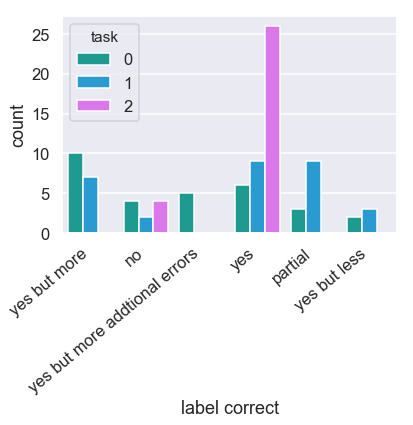

In [6]:
ax = sns.countplot(x='label correct', hue='task', data=result)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")